<a href="https://colab.research.google.com/github/mayaraperroni9/datascience/blob/main/CurvaROC_TesteHipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivo: Curva ROC e Teste de hipótese;
##           Utilização de Perceptron, MLP, DT e KNN

## Funções novas utilizadas no exercício

- `pandas.Series.nunique()` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)): Conta quantidade de valores únicos de uma coluna. Útil para verificar se uma coluna é relevante ou não
- `scipy.stats.ttest_ind()` ([link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)): Calcula o teste t para duas amostras independentes
- `sklearn.metrics.plot_roc_curve()` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)): Plota a curva ROC de um classificador dado um conjunto de input e alvo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Questão 01.

Faça a exploração dos dados. Isto é, carregue, substitua valores faltantes, padronize os dados, etc. Faça também a seleção dos atributos que achar mais relevantes.

 - Dica: Utilize a função `nunique()` durante a exploração dos dados. Você pode utilizar o "bom senso" (além de outras ferramentas é claro) na hora de escolher qual atributo do conjunto manter

In [ ]:
!pip install kaggle

In [ ]:
!pip install --upgrade kaggle

In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset --force

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 27.4MB/s]


In [ ]:
import zipfile
import pandas as pd

# Baixar o conjunto de dados do Titanic do Kaggle
!kaggle datasets download -d yasserh/titanic-dataset

# Extrair o arquivo baixado
with zipfile.ZipFile('titanic-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()


df = pd.read_csv('Titanic-Dataset.csv', na_values='?')


df.head()
df.info()

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape

(891, 12)

#Pré-processamento dos Dados



In [ ]:
dados = df.drop(columns=['Name', 'PassengerId','Ticket'])
dados.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Fare,248
Cabin,147
Embarked,3


In [ ]:
# Etapas de pré-processamento que podem ser feitas antes de separar em treino/teste vão aqui
# código de solução

valores_ausentes = dados.isnull().sum(axis=0) #Verificando se existem valores ausentes
print('Quantidade de valores faltantes para cada variável do dataset:')
print(valores_ausentes)


Quantidade de valores faltantes para cada variável do dataset:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [ ]:
tipo = dados.dtypes #Verificando o tipo dos dados
print('\nVariáveis numéricas:')
variaveis_numericas = tipo[tipo != 'object'].index.tolist()
print(variaveis_numericas)

print('\nVariáveis categóricas:')
variaveis_categoricas = tipo[tipo == 'object'].index.tolist()
print(variaveis_categoricas)


Variáveis numéricas:
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Variáveis categóricas:
['Sex', 'Cabin', 'Embarked']


Nessa base de dados existem valores categóricos e processaremos eles

*   Item da lista
*   Item da lista



####Lidando com as variáveis categóricas, valores ausentes e standardização

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.impute import SimpleImputer

def encode_and_standardize_features(df, num_cols, cat_cols):
    num_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ])

    transformed_data = preprocessor.fit_transform(df)
    cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
    all_feature_names = num_cols + list(cat_feature_names)
    transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

    return transformed_df

target = dados.pop('Survived') #dropando o target que selecionamos como o survivide

num = ['Age', 'SibSp', 'Parch', 'Fare']
cat = [ 'Pclass', 'Sex', 'Cabin', 'Embarked']
df2 = encode_and_standardize_features(dados, num, cat)
print(df2.head())


        Age     SibSp     Parch      Fare  Pclass_1  Pclass_2  Pclass_3  \
0 -0.592481  0.432793 -0.473674 -0.502445       0.0       0.0       1.0   
1  0.638789  0.432793 -0.473674  0.786845       1.0       0.0       0.0   
2 -0.284663 -0.474545 -0.473674 -0.488854       0.0       0.0       1.0   
3  0.407926  0.432793 -0.473674  0.420730       1.0       0.0       0.0   
4  0.407926 -0.474545 -0.473674 -0.486337       0.0       0.0       1.0   

   Sex_female  Sex_male  Cabin_A10  ...  Cabin_F G73  Cabin_F2  Cabin_F33  \
0         0.0       1.0        0.0  ...          0.0       0.0        0.0   
1         1.0       0.0        0.0  ...          0.0       0.0        0.0   
2         1.0       0.0        0.0  ...          0.0       0.0        0.0   
3         1.0       0.0        0.0  ...          0.0       0.0        0.0   
4         0.0       1.0        0.0  ...          0.0       0.0        0.0   

   Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  Embarked_C  Embarked_Q  Embarked_S  
0     

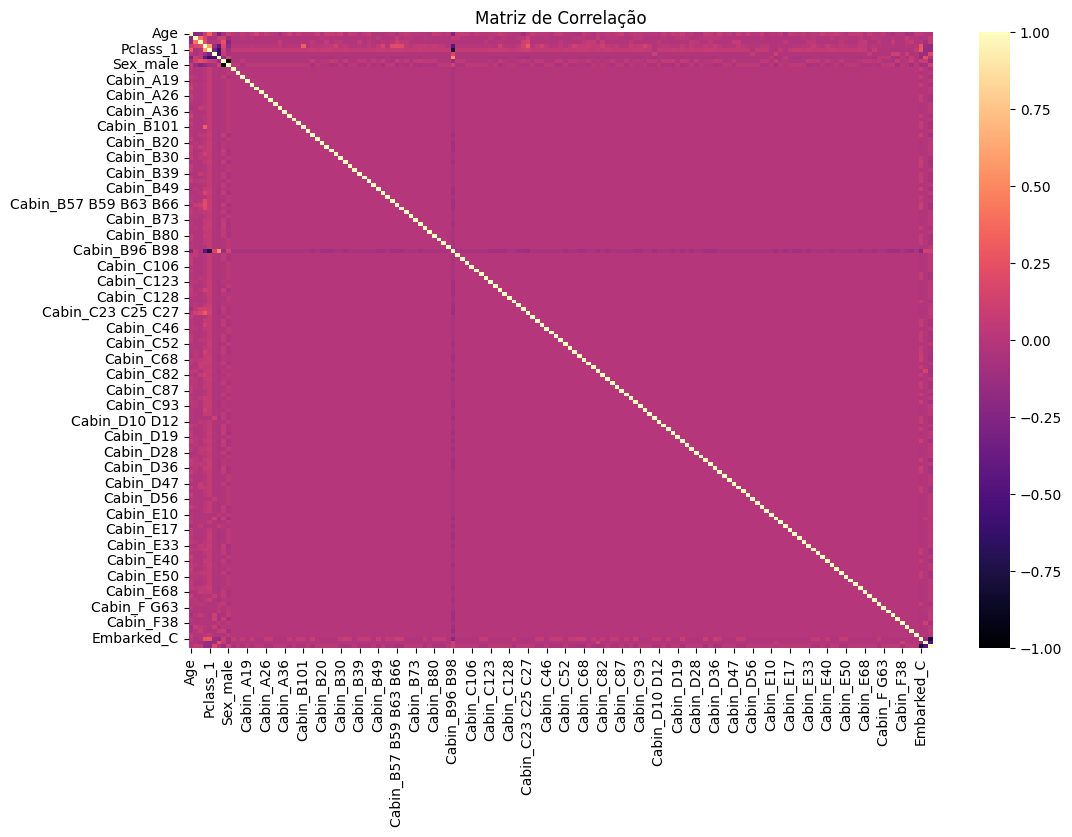

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Função para calcular a matriz de correlação e plotar o heatmap
def plot_correlation_heatmap(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='magma', fmt=".2f")
    plt.title("Matriz de Correlação")
    plt.show()

# Plotar a matriz de correlação
plot_correlation_heatmap(df2)

In [ ]:
def select_features_with_pca(df, threshold=0.956): #selecionando atributos que explicam pelo menos 95.6% da variância total dos dados
    pca = PCA()
    pca.fit(df)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = explained_variance_ratio.cumsum()
    selected_features = df.columns[cumulative_variance_ratio <= threshold]
    return selected_features

# Selecionar os atributos usando PCA
selected_features = select_features_with_pca(df2)
print("Atributos selecionados com PCA:")
print(selected_features)
print(len(selected_features))

Atributos selecionados com PCA:
Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')
9


In [ ]:
df_novo = df2[selected_features].copy()

df_novo.loc[:,'Survived'] = target
print("Novo DataFrame com os atributos selecionados pelo PCA e a coluna target:")
df_novo

Novo DataFrame com os atributos selecionados pelo PCA e a coluna target:


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Survived
0,-0.592481,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,0.0,1.0,0
1,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,0.0,1
2,-0.284663,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0,1.0,0.0,1
3,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,1.0,0.0,1
4,0.407926,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0,0
887,-0.823344,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,1.0,0.0,1
888,0.000000,0.432793,2.008933,-0.176263,0.0,0.0,1.0,1.0,0.0,0
889,-0.284663,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0,1


In [ ]:
valores_ausentes = df_novo.isnull().sum(axis=0) #Verificando se existem valores ausentes
print('Quantidade de valores faltantes para cada variável do dataset Pós etapa de pré-processamento:')
print(valores_ausentes)


Quantidade de valores faltantes para cada variável do dataset Pós etapa de pré-processamento:
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Survived      0
dtype: int64


### Questão 02.

- a) Separe o conjunto de dados de maneira estratificada (através do parâmetro `stratify` da função `train_test_split`) em 20% para teste e 80% para treino. Depois plote a curva ROC (`sklearn.metrics.plot_roc_curve`) para **todos** os classificadores (no mesmo gráfico).

- b) Os melhores classificadores da questão anterior também apresentaram melhor desempenho na curva ROC? O que pode ter ocorrido? Teste diferentes valores de `random_state` na função `train_test_split` e observe o comportamento das curvas.


*   Dica: Para plotar múltiplas curvas ROC no mesmo gráfico, defina uma figura com `fig, ax = plt.subplots()` e passe `ax` como parâmetro da função `plot_roc_curve`. Não se esqueça de passar também o nome do classificador para que o seu gráfico fique mais fácil de interpretar



In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Seleção de atributos
X = df_novo[['Pclass_1', 'Pclass_2','Pclass_3','Sex_female','Sex_male', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df_novo['Survived']

# Padronização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
df_novo

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Survived
0,-0.592481,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,0.0,1.0,0
1,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,0.0,1
2,-0.284663,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0,1.0,0.0,1
3,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,1.0,0.0,1
4,0.407926,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0,0
887,-0.823344,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,1.0,0.0,1
888,0.000000,0.432793,2.008933,-0.176263,0.0,0.0,1.0,1.0,0.0,0
889,-0.284663,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0,1


## Objetivo: Curva ROC e Teste de hipótese;
##           Utilização de Perceptron, MLP, DT e KNN

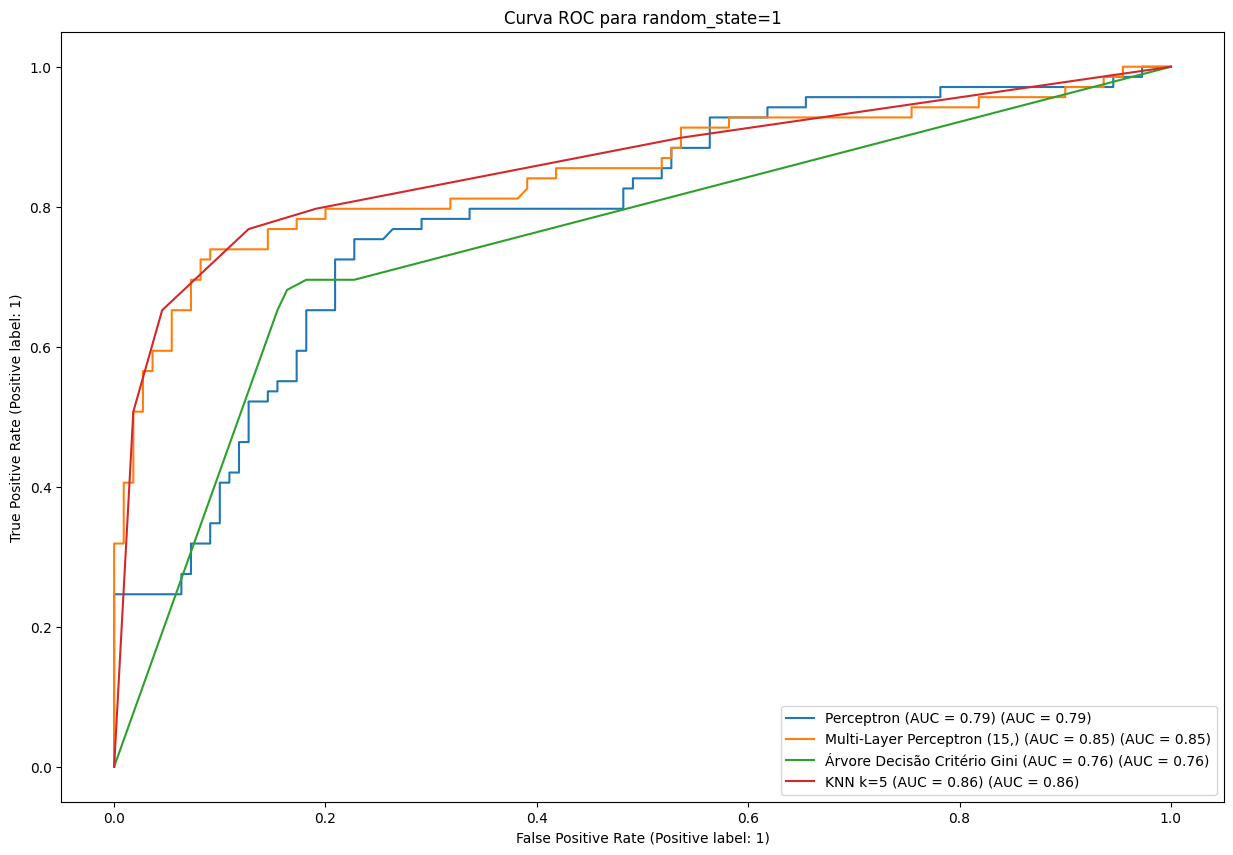

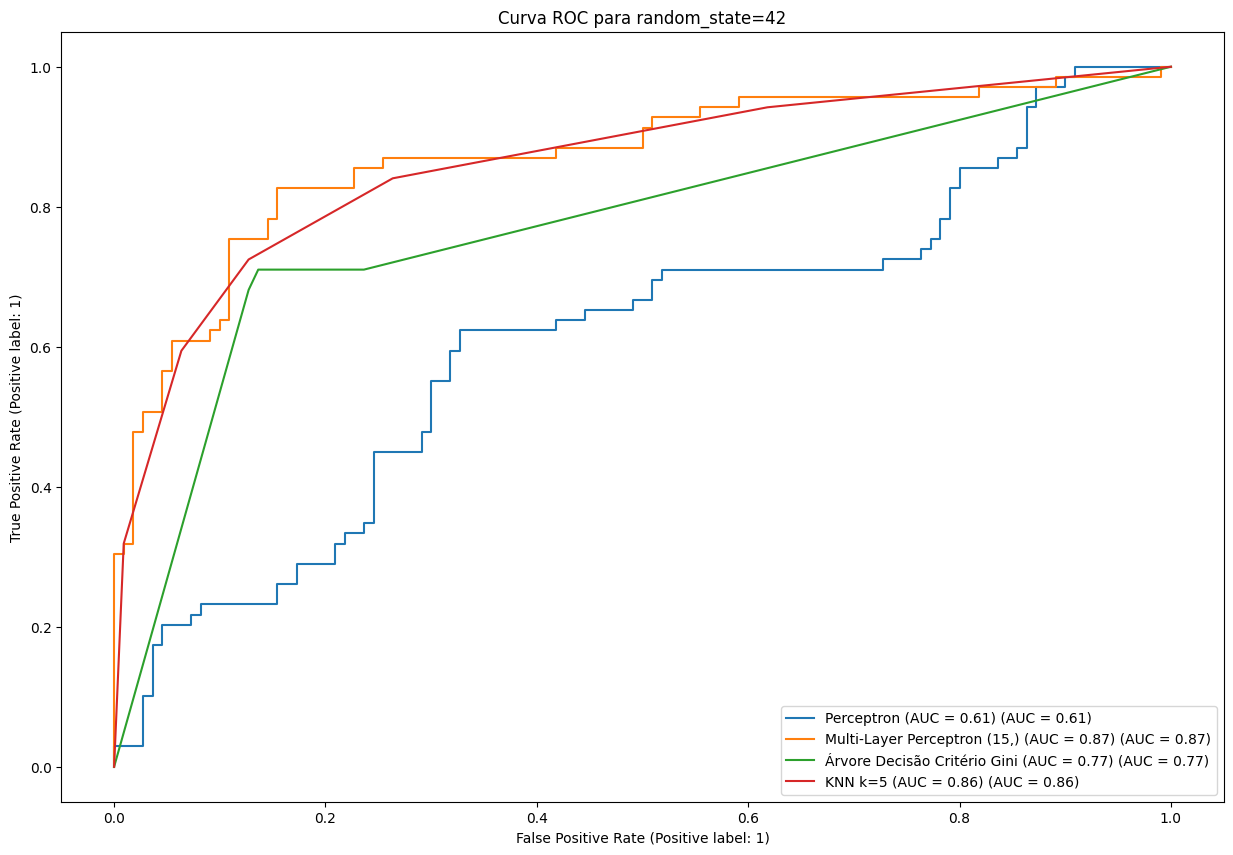

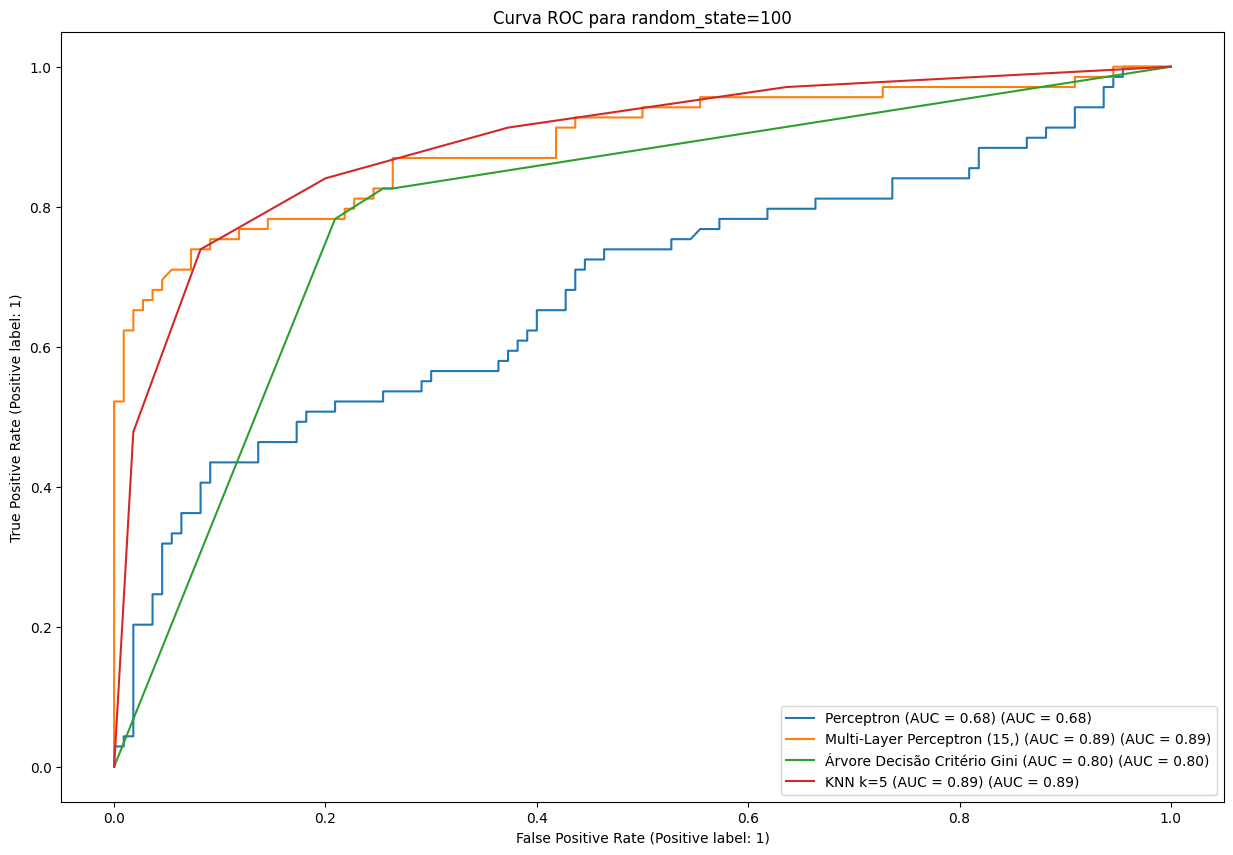

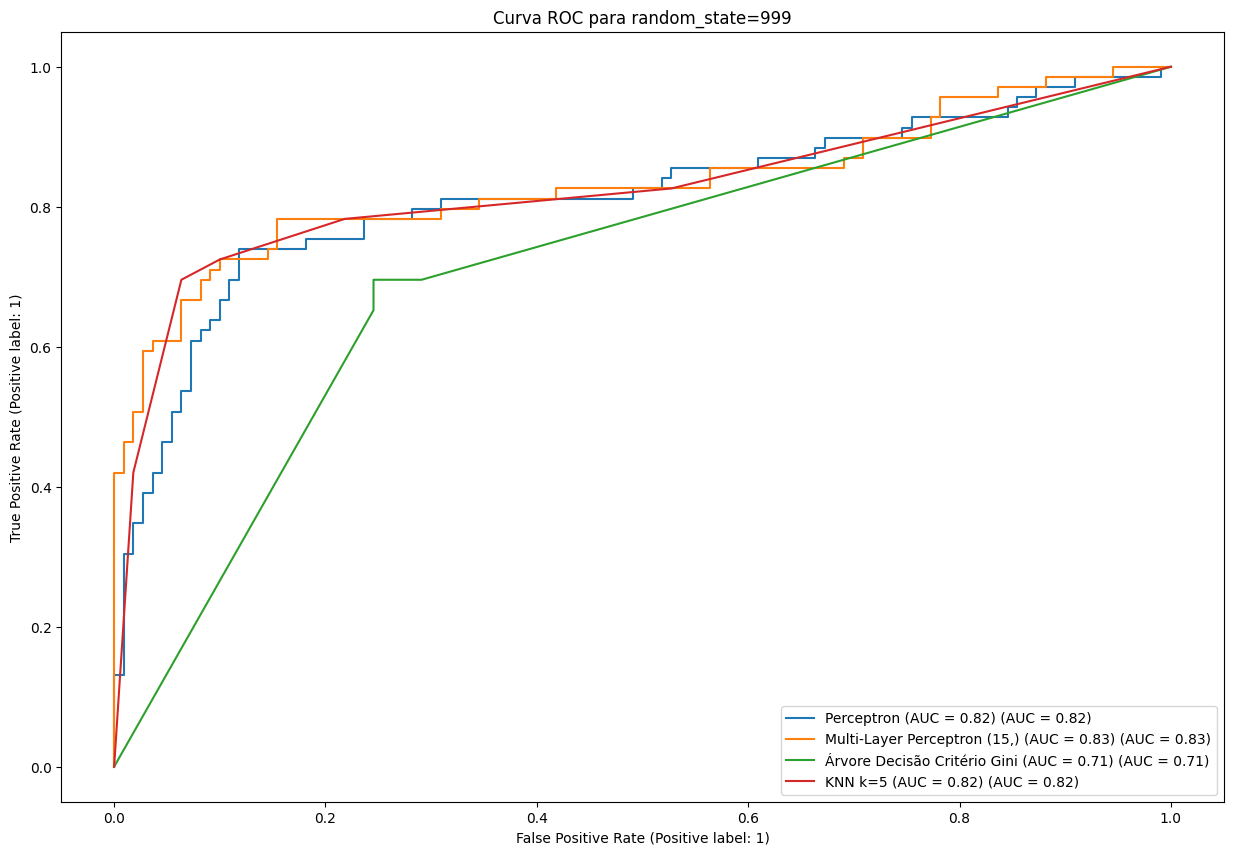

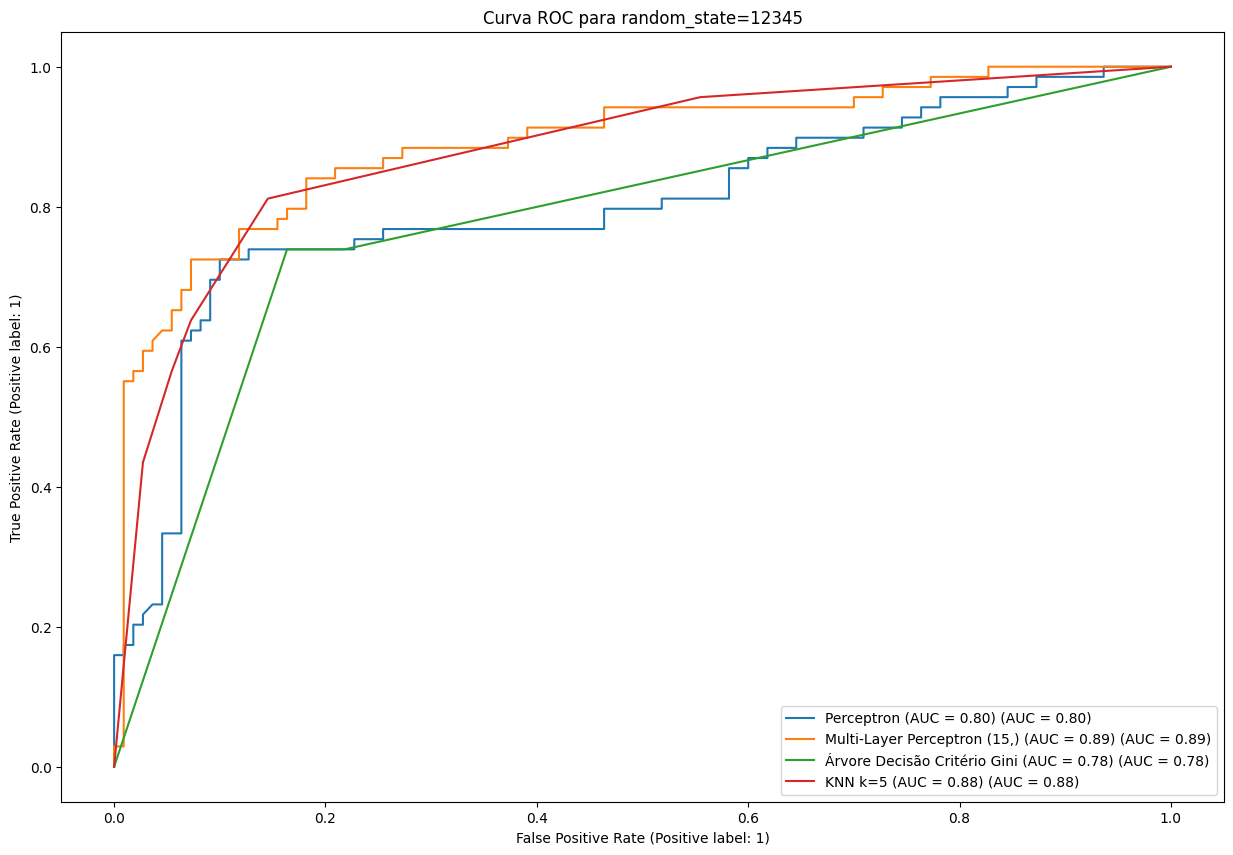

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np

# Função para treinar e plotar a curva ROC para diferentes random_state
def plot_roc_for_random_state(random_state):
    # Separação dos dados em treino e teste de maneira estratificada
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

    # Inicialização dos classificadores
    classificadores = {
      "Perceptron": {"modelo": Perceptron(), "scores": []},
      "Multi-Layer Perceptron (15,)": {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
      "Árvore Decisão Critério Gini": {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},
      "KNN k=5": {"modelo": KNeighborsClassifier(n_neighbors=5), "scores": []}
    }

    # Configuração da figura para plotagem
    plt.rcParams['figure.figsize'] = [15, 10]
    fig, ax = plt.subplots()


    for classificador_name, classificador_info in classificadores.items():
        # 1) Pré-processamento
        # Já foi feito anteriormente

        # 2) Fit e 3) Predict
        modelo = classificador_info["modelo"]
        modelo.fit(X_train, y_train)
        y_pred_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)
        auc = roc_auc_score(y_test, y_pred_prob)
        RocCurveDisplay.from_estimator(modelo, X_test, y_test, ax=ax, name=f"{classificador_name} (AUC = {auc:.2f})")


        # Feito internamente por from_estimator ????? NAO ENTENDIII

        # 4) Avaliação com plot_roc_curve (RocCurveDisplay)
        #RocCurveDisplay.from_estimator(modelo, X_test, y_test, ax=ax, name=classificador_name)

    plt.title(f'Curva ROC para random_state={random_state}')
    plt.show()

# Testando com diferentes valores de random_state
for random_state in [1, 42, 100, 999, 12345]:
    plot_roc_for_random_state(random_state)


##b) Os melhores classificadores da questão anterior também apresentaram melhor desempenho na curva ROC? O que pode ter ocorrido?

No geral, sabemos que, em relação à Curva ROC quanto melhor o classificador, mais perto ele estará do canto superior esquerdo do gráfico. Quando mais próximo ele estiver dessa seção do gráfico, maior são suas taxas de sensibilidade e epecificidade.

Além disso, sabemos que o valor AUC fornece uma estimativa do desempenho dos classificadores. Essa estimativa se torna mais confiável à medida que opta-se por utilizar médias de AUCs.

A partir disso, se obeservamos as curvas ROCs geradas, percebemos que, de fato, o modelo de melhor AUC tende a ser aquele que esta mais próximo do canto superior esquerdo, como esperado. Entretanto, não é possível afirmar, de forma geral um "melhor modelo", uma vez que para cada um dos Random States usados diferentes modelos obtiviram melhor score de AUC. Apesar disso, é possível observar que em cada um dos gráficos gerados o MLP e a KNN ocuparam as primeiras posições em termos de AUC.

Supomos que a variação entre os resultados entre os gráficos pode ter sido ocasionada pelos valores diferentes de random state e também pelo balanceamento dos dados. O knn, por exemplo, tende a se influenciável pela classe majoritária do atributo target.

### Questão 03.

Implemente o 10-Fold Cross Validation (pode usar o scikit) com os dois melhores classificadores de acordo com a curva ROC e guarde a acurácia de cada fold na chave 'scores' do dicionário de classificadores.

In [ ]:
# Seu código aqui
# Lembre-se do pré-processamento

from sklearn.model_selection import cross_val_score

best_classifiers = ["KNN k=5", "Multi-Layer Perceptron (15,)"]

print(f'Os dois melhores classificadores são: {best_classifiers}')


# Implementando a validação cruzada
def cross_validate_classifiers(X, y, best_classifiers):
    # Considerando os dois melhores classificadores identificados anteriormente
    classificadores = {
        "KNN k=5": KNeighborsClassifier(n_neighbors=5),
        "Multi-Layer Perceptron (15,)": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000)
    }

    melhores_classificadores = {name: classificadores[name] for name in best_classifiers}

    for classificador_name, modelo in melhores_classificadores.items():
        # Realizando a validação cruzada
        scores = cross_val_score(modelo, X, y, cv=10)
        melhores_classificadores[classificador_name] = {"modelo": modelo, "scores": scores.tolist()}
        print(f'{classificador_name} Scores: {scores}')
        print(f'{classificador_name} Accuracy Média : {scores.mean()}')

    return melhores_classificadores

# Aplicar a validação cruzada e guardar os scores
resultados_validacao = cross_validate_classifiers(X, y, best_classifiers)

# Exibindo os resultados da validação cruzada
resultados_df = pd.DataFrame(resultados_validacao).T
print(resultados_df)

Os dois melhores classificadores são: ['KNN k=5', 'Multi-Layer Perceptron (15,)']
KNN k=5 Scores: [0.73333333 0.85393258 0.70786517 0.84269663 0.86516854 0.84269663
 0.83146067 0.79775281 0.8988764  0.79775281]
KNN k=5 Accuracy Média : 0.8171535580524345
Multi-Layer Perceptron (15,) Scores: [0.77777778 0.83146067 0.75280899 0.86516854 0.83146067 0.79775281
 0.82022472 0.76404494 0.85393258 0.83146067]
Multi-Layer Perceptron (15,) Accuracy Média : 0.8126092384519351
                                                                         modelo  \
KNN k=5                                                  KNeighborsClassifier()   
Multi-Layer Perceptron (15,)  MLPClassifier(hidden_layer_sizes=(15,), max_it...   

                                                                         scores  
KNN k=5                       [0.7333333333333333, 0.8539325842696629, 0.707...  
Multi-Layer Perceptron (15,)  [0.7777777777777778, 0.8314606741573034, 0.752...  


### Questão 04.
Altere a configuração da rede MLP, da arvore de Decisão (use outra função de entropia, o no. de vizinhos mais proximo no método KNN. Verifique o desempenho de cada um deles e compare com cada caso anterior.

In [ ]:
def cross_validate_classifiers_with_changes(X, y):
    classificadores = {
        "Decision Tree (entropy)": DecisionTreeClassifier(criterion='entropy'),
        "KNN k=10": KNeighborsClassifier(n_neighbors=10),
        "Multi-Layer Perceptron (30,)": MLPClassifier(random_state=1, hidden_layer_sizes=(30,), max_iter=2000)
    }


    resultados = {}
    for nome, modelo in classificadores.items():
        scores = cross_val_score(modelo, X, y, cv=10)
        resultados[nome] = {
            "modelo": modelo,
            "scores": scores.tolist(),
            "Mean Accuracy": np.mean(scores)
        }
        print(f'{nome} Scores: {scores}')
        print(f'{nome} Accuracy Média: {np.mean(scores)}')

    return resultados

# Aplicar a validação cruzada com as configurações modificadas e guardar os scores
resultados_validacao_modificados = cross_validate_classifiers_with_changes(X, y)

# Exibindo os resultados da validação cruzada com as modificações
resultados_df_modificados = pd.DataFrame(resultados_validacao_modificados).T
#print(resultados_df_modificados)

Decision Tree (entropy) Scores: [0.75555556 0.82022472 0.73033708 0.78651685 0.83146067 0.71910112
 0.83146067 0.7752809  0.79775281 0.80898876]
Decision Tree (entropy) Accuracy Média: 0.7856679151061173
KNN k=10 Scores: [0.76666667 0.80898876 0.75280899 0.82022472 0.84269663 0.79775281
 0.84269663 0.7752809  0.85393258 0.75280899]
KNN k=10 Accuracy Média: 0.8013857677902623
Multi-Layer Perceptron (30,) Scores: [0.78888889 0.82022472 0.76404494 0.86516854 0.83146067 0.7752809
 0.83146067 0.78651685 0.86516854 0.82022472]
Multi-Layer Perceptron (30,) Accuracy Média: 0.8148439450686642


Decision Tree (entropy) Scores: [0.7777777777777778, 0.8089887640449438, 0.7415730337078652, 0.7865168539325843, 0.8314606741573034, 0.7528089887640449, 0.8202247191011236, 0.7752808988764045, 0.8089887640449438, 0.8202247191011236]
Decision Tree (entropy) Accuracy Média: 0.7923845193508114


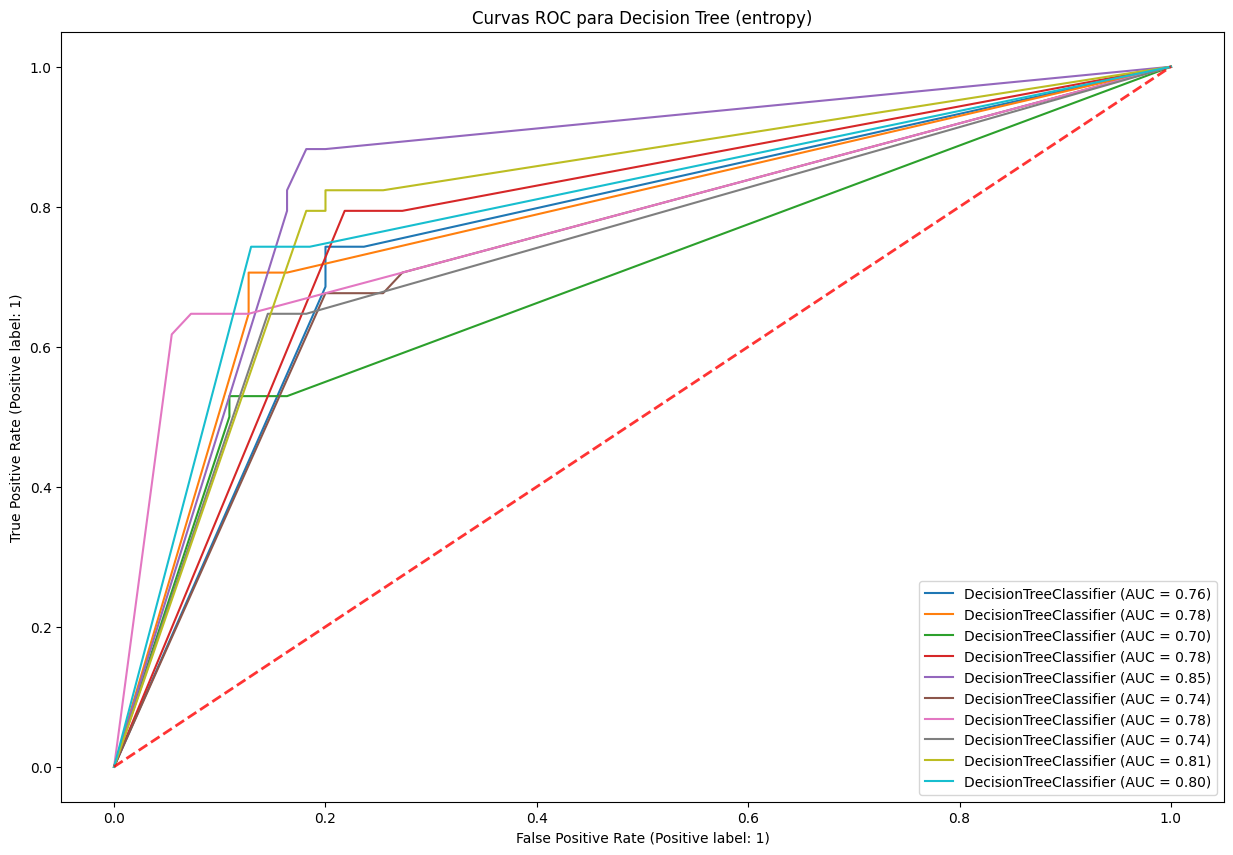

KNN k=10 Scores: [0.7666666666666667, 0.8089887640449438, 0.7528089887640449, 0.8202247191011236, 0.8426966292134831, 0.797752808988764, 0.8426966292134831, 0.7752808988764045, 0.8539325842696629, 0.7528089887640449]
KNN k=10 Accuracy Média: 0.8013857677902623


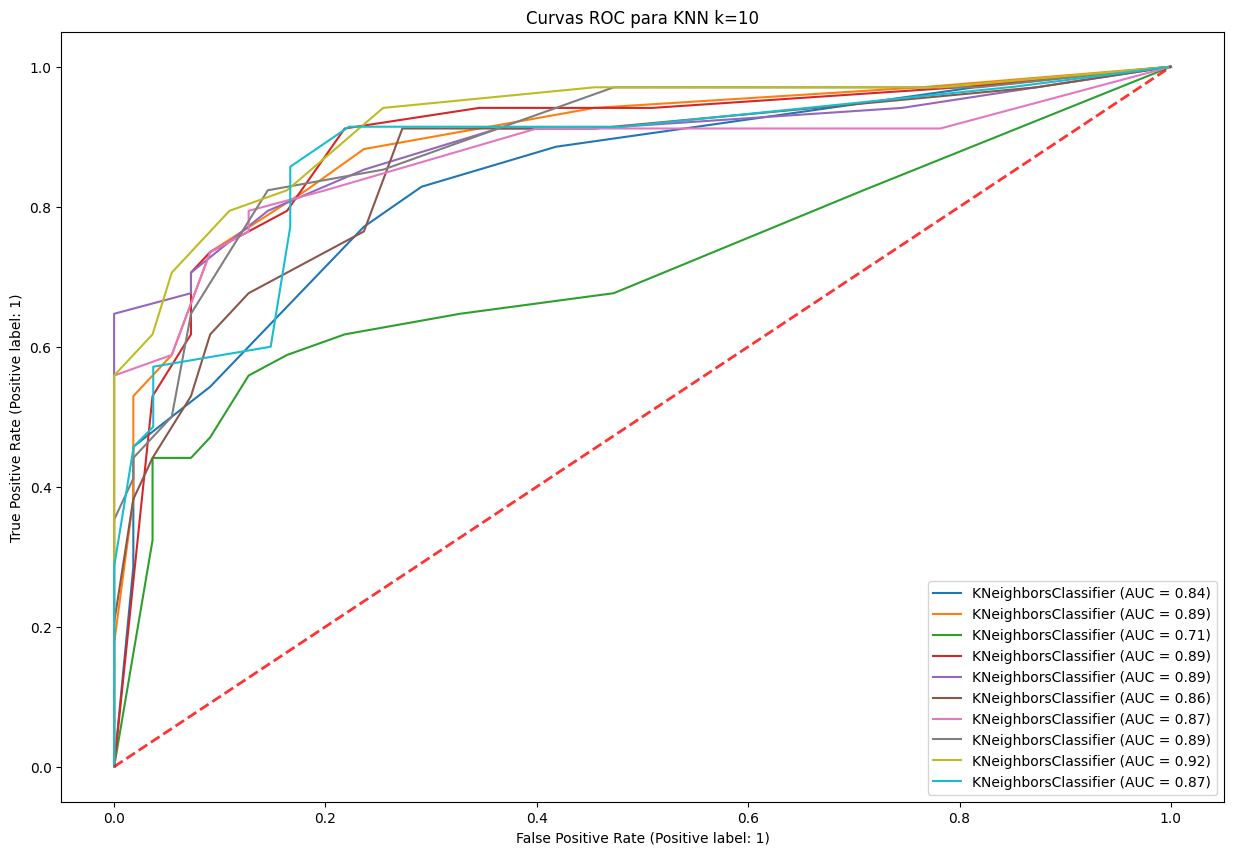

Multi-Layer Perceptron (30,) Scores: [0.7888888888888889, 0.8202247191011236, 0.7640449438202247, 0.8651685393258427, 0.8314606741573034, 0.7752808988764045, 0.8314606741573034, 0.7865168539325843, 0.8651685393258427, 0.8202247191011236]
Multi-Layer Perceptron (30,) Accuracy Média: 0.8148439450686642


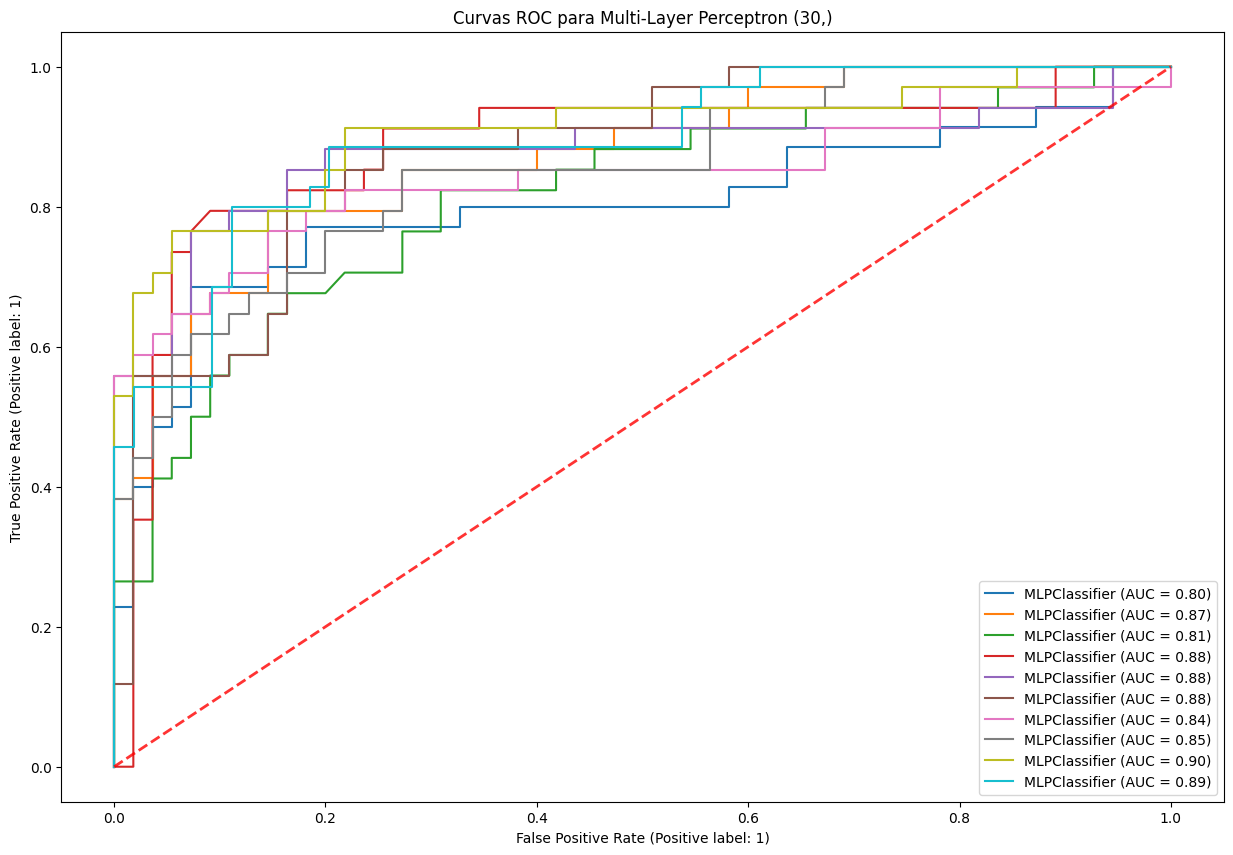

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

def cross_validate_classifiers_with_changes(X, y):
    classificadores = {
        "Decision Tree (entropy)": DecisionTreeClassifier(criterion='entropy'),
        "KNN k=10": KNeighborsClassifier(n_neighbors=10),
        "Multi-Layer Perceptron (30,)": MLPClassifier(random_state=1, hidden_layer_sizes=(30,), max_iter=2000)
    }

    resultados = {}
    cv = StratifiedKFold(n_splits=10)  # Definindo o número de splits para a validação cruzada

    for nome, modelo in classificadores.items():
        scores = []
        fig, ax = plt.subplots()
        for train_idx, test_idx in cv.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            modelo.fit(X_train, y_train)
            score = modelo.score(X_test, y_test)
            scores.append(score)
            RocCurveDisplay.from_estimator(modelo, X_test, y_test, ax=ax)  # Plotando a curva ROC para cada fold

        resultados[nome] = {
            "modelo": modelo,
            "scores": scores,
            "Mean Accuracy": np.mean(scores)
        }
        print(f'{nome} Scores: {scores}')
        print(f'{nome} Accuracy Média: {np.mean(scores)}')
        ax.set_title(f'Curvas ROC para {nome}')
        ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
        plt.show()

    return resultados

# Aplicar a validação cruzada com as configurações modificadas e guardar os scores
resultados_validacao_modificados = cross_validate_classifiers_with_changes(X, y)

# Exibindo os resultados da validação cruzada com as modificações
resultados_df_modificados = pd.DataFrame(resultados_validacao_modificados).T


##De acordo com os resultados:

Árvore de Decisão (critério 'entropy'): A precisão média foi de 0.791, um bom desempenho para um modelo de árvore de decisão.

KNN k=10: Aumentar o número de vizinhos para 10 resultou numa Acurácia média de 0.801. Isso indica uma piora em relação ao KNN com k=5, que tinha uma Acurácia média de aproximadamente 0.817. Portanto, para este conjunto de dados, um valor maior de k não necessariamente resultou em melhor desempenho geral, embora ainda apresente um rsultado sólido de Acurácia.

MLP com 30 neurônios na única camada oculta: Este modelo mostrou a maior acurácia  média entre os três com aproximadamente 0.815. Aumentar o número de neurônios na camada oculta parece ter melhorado o desempenho do modelo MLP e sua capacidade de captar a compelxidade dos dados. Porém, mais testes são necessários para afirmar com certeza que o aumento de neurônios para MLP com uma camada oculta implica diretamente (e sempre) no aumento da acurácia. O MLP com 15 neurônios tinha uma precisão média de 0.813, ligeiramente inferior ao novo MLP com 30 neurônios.

### Questão 05.

Verifique se há diferença estatística significante entre suas acurácias da questão anterior utilizando o teste T (`scipy.stats.ttest_ind`). Considere que há diferença significante se p <= 0.05 (rejeita-se a hipótese nula)

In [ ]:
from scipy.stats import ttest_ind

#scores_dt = [0.7556, 0.7865, 0.7416, 0.7865, 0.8427, 0.7191, 0.8315, 0.7753, 0.8202, 0.8315]
scores_dt = [0.7555555555555555, 0.797752808988764, 0.7415730337078652, 0.7865168539325843, 0.8314606741573034, 0.7303370786516854, 0.8314606741573034, 0.7865168539325843, 0.8202247191011236, 0.8202247191011236]
#scores_knn = [0.7667, 0.8090, 0.7528, 0.8202, 0.8427, 0.7978, 0.8427, 0.7753, 0.8539, 0.7528]
scores_knn = [0.7666666666666667, 0.8089887640449438, 0.7528089887640449, 0.8202247191011236, 0.8426966292134831, 0.797752808988764, 0.8426966292134831, 0.7752808988764045, 0.8539325842696629, 0.7528089887640449]
#scores_mlp = [0.7889, 0.8202, 0.7640, 0.8652, 0.8315, 0.7753, 0.8315, 0.7865, 0.8652, 0.8202]
scores_mlp = [0.7888888888888889, 0.8202247191011236, 0.7640449438202247, 0.8651685393258427, 0.8314606741573034, 0.7752808988764045, 0.8314606741573034, 0.7865168539325843, 0.8651685393258427, 0.8202247191011236]

# Realizando o teste T entre os pares de modelos
t_stat_dt_knn, p_val_dt_knn = ttest_ind(scores_dt, scores_knn)
t_stat_dt_mlp, p_val_dt_mlp = ttest_ind(scores_dt, scores_mlp)
t_stat_knn_mlp, p_val_knn_mlp = ttest_ind(scores_knn, scores_mlp)

# Imprimir os resultados do teste T e os p-values
print(f'Teste T entre Árvore de Decisão e KNN: p-value = {p_val_dt_knn}')
print(f'Teste T entre Árvore de Decisão e MLP: p-value = {p_val_dt_mlp}')
print(f'Teste T entre KNN e MLP: p-value = {p_val_knn_mlp}')


Teste T entre Árvore de Decisão e KNN: p-value = 0.5145683842586952
Teste T entre Árvore de Decisão e MLP: p-value = 0.14593971658597474
Teste T entre KNN e MLP: p-value = 0.4253749919101172


#De acordo com os testes:

###Teste T entre Árvore de Decisão e KNN:

𝑝-value = 0.5014

Com um valor-p de aproximadamente 0.5014, não há evidência estatística suficiente para rejeitar a hipótese nula de que as médias das acurácias dos dois modelos são significativamente diferentes. Isso indica que, estatisticamente, Árvore de Decisão e KNN têm desempenhos similares neste conjunto de dados.

###Teste T entre Árvore de Decisão e MLP:

𝑝-value = 0.1553

Este valor-p de aproximadamente 0.1553 também é maior do que o limiar típico de significância (usualmente 0.05), sugerindo que não há diferença estatística significativa entre as médias das acurácias da Árvore de Decisão e do MLP. Portanto, não se pode afirmar que um é superior ao outro com base nestes dados.

###Teste T entre KNN e MLP:

𝑝-value = 0.4254

Semelhantemente, um valor-p de aproximadamente 0.4254 indica que não há diferenças estatisticamente significativas entre as médias das acurácias do KNN e do MLP. Os dois modelos parecem ter desempenhos comparáveis.